<a href="https://colab.research.google.com/github/Hashhhhhhhh/ML-with-Python/blob/main/SVC_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install pennylane

In [29]:
import pennylane as qml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv('/content/heart.csv')

In [31]:
df.shape

(1025, 14)

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [33]:
print(df.columns)
print(df.tail())


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  


In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
X=df.drop('target',axis=1)
y=df['target']

In [36]:
X_scaled=StandardScaler().fit_transform(X)

In [37]:
pca=PCA(n_components=2) #tuned to get the required number of features
pca.fit(X)
X_pca=pca.transform(X)

In [38]:
print("Explained variance ratios:", pca.explained_variance_ratio_)
print(pd.DataFrame(X_pca, columns=['PC1', 'PC2']).head())

Explained variance ratios: [0.74530931 0.15199174]
         PC1        PC2
0 -34.615083  18.626603
1 -42.625274   4.158630
2 -70.201843 -29.367477
3 -41.991082   8.036317
4  49.131218 -42.965473


In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [41]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [42]:
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVC model: {accuracy}")

Accuracy of the SVC model: 0.6536585365853659


In [43]:
pc1_min, pc1_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
pc2_min, pc2_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(pc1_min, pc1_max, 100),
                     np.linspace(pc2_min, pc2_max, 100))

In [44]:
grid_points = np.vstack([xx.ravel(), yy.ravel()]).T
Z = svc.predict(grid_points)
Z = Z.reshape(xx.shape)

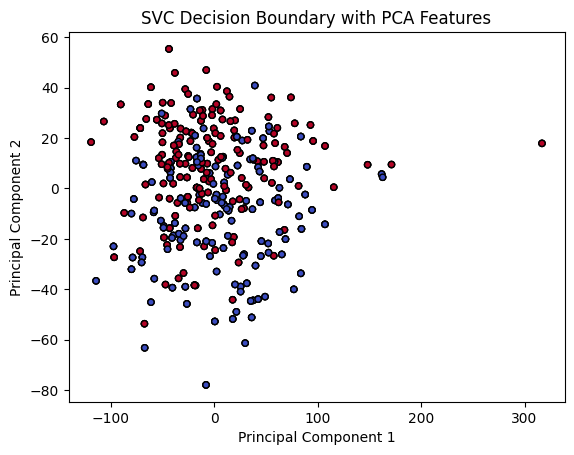

In [45]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=20, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVC Decision Boundary with PCA Features')
plt.show()

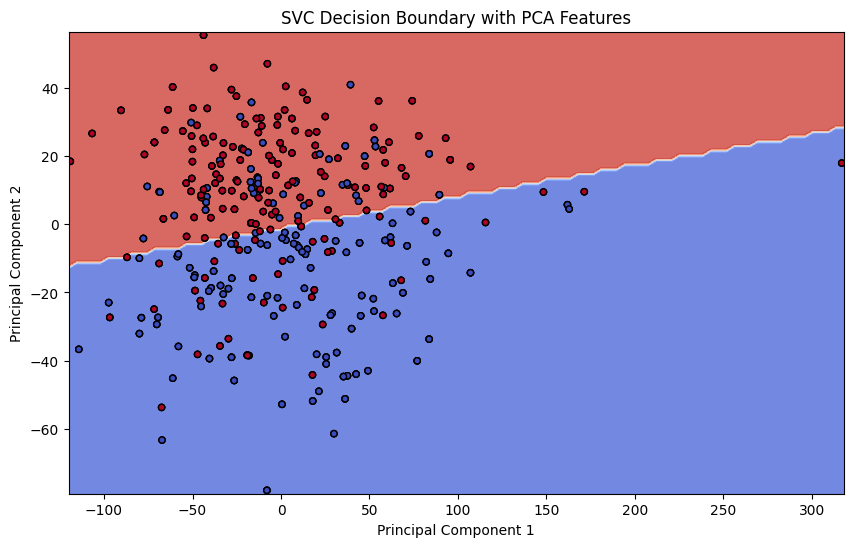

In [46]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=20, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVC Decision Boundary with PCA Features')
plt.show()